In this notebook, we address one of the most important preprocessing steps in time series analysis: **making the data stationary**.


##  What is Stationarity?

A time series is **stationary** if it has:

- Constant **mean**
- Constant **variance**
- Constant **correlation** over time

Most models like ARIMA/SARIMA assume that your series is stationary.  
If it's not, they will give poor or misleading predictions.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**Dataset:**

Air passengers data 

In [3]:
data = pd.read_csv('/kaggle/input/airpassengers-dataframe/AirPassengers.csv')

In [4]:
data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,112,118,132,129,121,135,148,148,136,119,104,118
1,115,126,141,135,125,149,170,170,158,133,114,140
2,145,150,178,163,172,178,199,199,184,162,146,166
3,171,180,193,181,183,218,230,242,209,191,172,194
4,196,196,236,235,229,243,264,272,237,211,180,201
5,204,188,235,227,234,264,302,293,259,229,203,229
6,242,233,267,269,270,315,364,347,312,274,237,278
7,284,277,317,313,318,374,413,405,355,306,271,306
8,315,301,356,348,355,422,465,467,404,347,305,336
9,340,318,362,348,363,435,491,505,404,359,310,337


Adding the year manually because that data is missing in the actually data

In [5]:
data['Year'] = list(range(1949, 1949 + len(data)))

In [6]:
data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,112,118,132,129,121,135,148,148,136,119,104,118,1949
1,115,126,141,135,125,149,170,170,158,133,114,140,1950
2,145,150,178,163,172,178,199,199,184,162,146,166,1951
3,171,180,193,181,183,218,230,242,209,191,172,194,1952
4,196,196,236,235,229,243,264,272,237,211,180,201,1953


changing the format of the data for proper analysis

In [7]:
df = data.melt(id_vars='Year', var_name='Month', value_name='Passengers')

In [8]:
df.head()

,Year,Month,Passengers
0,1949,Jan,112
1,1950,Jan,115
2,1951,Jan,145
3,1952,Jan,171
4,1953,Jan,196


conversion of year and month to proper data because timeseries works better on the datatime format data

In [9]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')
df.set_index('Date', inplace=True)
df = df[['Passengers']]

In [10]:
df.head()

,Passengers
Date,
1949-01-01,112
1950-01-01,115
1951-01-01,145
1952-01-01,171
1953-01-01,196


In [19]:
df = df.sort_index()

**Visualize Original Series**

We plot the AirPassengers dataset to inspect its trend.

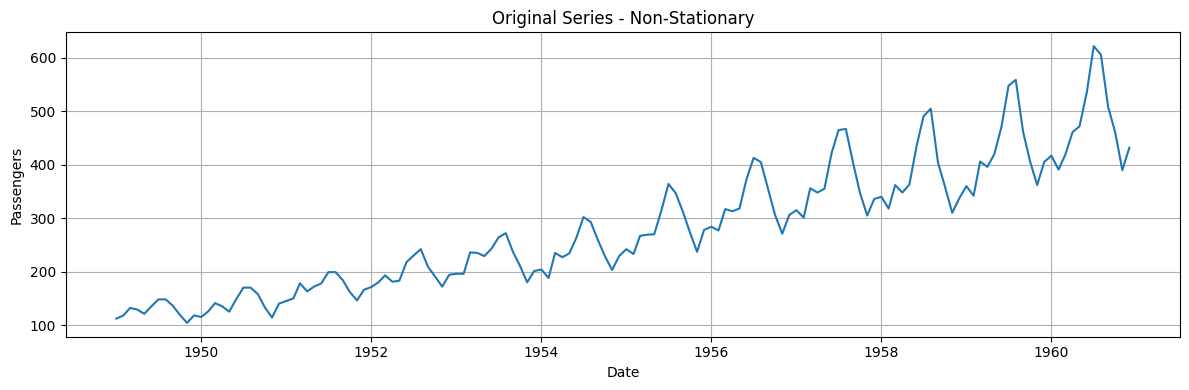

In [20]:
# Ensure Date index is sorted

plt.figure(figsize=(12, 4))
plt.plot(df['Passengers'])
plt.title("Original Series - Non-Stationary")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.grid(True)
plt.tight_layout()
plt.show()

**ADF Test (Augmented Dickey-Fuller)**

- p-value > 0.05 → series is non-stationary

In [25]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Passengers'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 0.8153688792060472
p-value: 0.991880243437641


**First Differencing**

To remove trend, we apply .diff():

- Subtracts the previous value from each data point

- This removes the upward trend and helps flatten the series

In [22]:
df['Diff_1'] = df['Passengers'].diff()

**Plot the Differenced Series**

- Now the data oscillates around a flat line

- It shows more stability, less trend


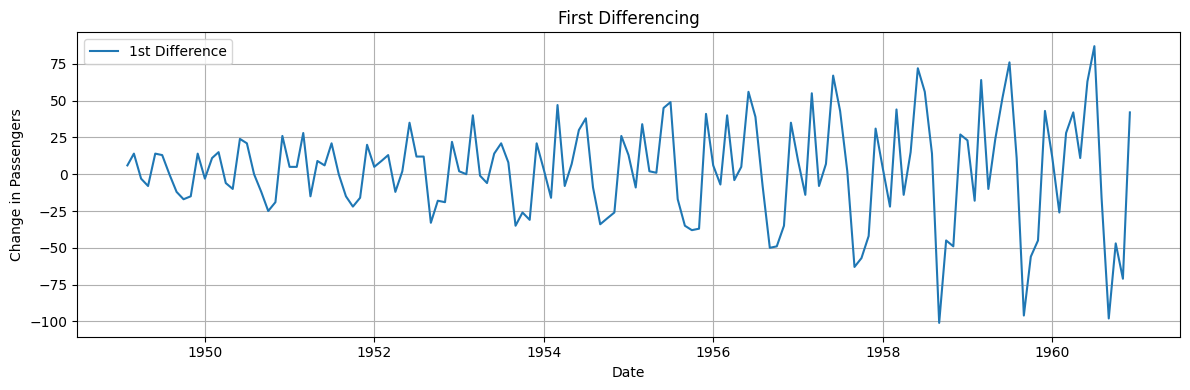

In [26]:

# Plot first difference as a single line
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['Diff_1'], label='1st Difference')
plt.title("First Differencing")
plt.xlabel("Date")
plt.ylabel("Change in Passengers")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


**ADF Test After Differencing**

In [27]:
result_diff = adfuller(df['Diff_1'].dropna())
print(f"ADF Statistic (Diff): {result_diff[0]}")
print(f"p-value (Diff): {result_diff[1]}")

ADF Statistic (Diff): -2.8292668241699905
p-value (Diff): 0.05421329028382671


P value is equals to 0.05 so now the data is stationary and read to use for ARIMA/SARIMA models